<a href="https://colab.research.google.com/github/guillotatis/talentotech/blob/main/Eda_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Importar Librerías necesarias para el análisis exploratorio de los datos

import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.tools import FigureFactory as ff
from plotly.offline import iplot
from datetime import timedelta

In [2]:
# Configuración de estilo y paleta de colores
sns.set_style('whitegrid')
palette = 'Set2'

# Ignorar las advertencias
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "/content/online_retail_II.xlsx"
df = pd.read_excel(path)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.shape

(525461, 8)

In [7]:
# Convertir la columna 'Customer ID' a tipo object
df['Customer ID'] = df['Customer ID'].astype('object')

# Verificar los tipos de datos para confirmar el cambio
print(df.dtypes)

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object


In [8]:
# Encontrar la fecha mínima y máxima en el dataset
fecha_minima = df['InvoiceDate'].min()
fecha_maxima = df['InvoiceDate'].max()

print("Fecha mínima en el dataset:", fecha_minima)
print("Fecha máxima en el dataset:", fecha_maxima)

Fecha mínima en el dataset: 2009-12-01 07:45:00
Fecha máxima en el dataset: 2010-12-09 20:01:00


In [9]:
#clasificar columnas
data = df.copy()
categoricas = data.select_dtypes(include=['object']).columns.tolist()
numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas categóricas:", categoricas)
print("Columnas numéricas:", numericas)

Columnas categóricas: ['Invoice', 'StockCode', 'Description', 'Customer ID', 'Country']
Columnas numéricas: ['Quantity', 'Price']


In [10]:
data.describe()

,Quantity,InvoiceDate,Price
count,525461.000000,525461,525461.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834
min,-9600.000000,2009-12-01 07:45:00,-53594.360000
25%,1.000000,2010-03-21 12:20:00,1.250000
50%,3.000000,2010-07-06 09:51:00,2.100000
75%,10.000000,2010-10-15 12:45:00,4.210000
max,19152.000000,2010-12-09 20:01:00,25111.090000
std,107.424110,NaN,146.126914


In [11]:
# Función para verificar el dataframe
def check_df(dataframe, head=5):
    """
    Función para verificar el dataframe:
    - Muestra la forma, tipos de datos, valores perdidos y duplicados del dataframe.
    """
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(70,'-'))
    print(dataframe.describe().T)

check_df(data)

------------------------------- SHAPE --------------------------------
Rows: 525461
Columns: 8
------------------------------- TYPES --------------------------------
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object
--------------------------- MISSING VALUES ---------------------------
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
6865
------------------------------ DESCRIBE ------------------------------
                count                           mean                  min  \
Quantity     525461.0                      10.337667              -9600.0   
InvoiceDate    5254

In [12]:
data.dropna(inplace=True)

In [13]:
check_df(data)

------------------------------- SHAPE --------------------------------
Rows: 417534
Columns: 8
------------------------------- TYPES --------------------------------
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object
--------------------------- MISSING VALUES ---------------------------
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
6771
------------------------------ DESCRIBE ------------------------------
                count                           mean                  min  \
Quantity     417534.0                      12.758815              -9360.0   
InvoiceDate    417534  2010-07-01 01:12:19.787609856  2009-

In [14]:
# Se eliminan las transacciones de productos devueltos (valores negativos -> El Id de la factura contiene la letra "C").

data_Invoice = pd.DataFrame({"Invoice":[row for row in data["Invoice"].values if "C"  not in str(row)]})
data_Invoice.head()
data_Invoice = data_Invoice.drop_duplicates("Invoice")

# The transactions except returned product transactions
data = data.merge(data_Invoice, on = "Invoice")

In [15]:
check_df(data)

------------------------------- SHAPE --------------------------------
Rows: 407695
Columns: 8
------------------------------- TYPES --------------------------------
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object
--------------------------- MISSING VALUES ---------------------------
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
6748
------------------------------ DESCRIBE ------------------------------
                count                           mean                  min  \
Quantity     407695.0                      13.586686                  1.0   
InvoiceDate    407695  2010-07-01 10:10:10.782177792  2009-

In [16]:
#Eliminar los valores menores o iguales a 0 en las variables Cantidad y Precio.

In [17]:
data = data[data["Quantity"] > 0]
data = data[data["Price"] > 0]

In [18]:
# Número único de productos (con descripción).

data.Description.nunique()

4444

In [19]:
# Número único de productos (con StockCode).

data.StockCode.nunique()

4017

In [20]:
#Los valores únicos de estas dos variables (Description y StockCode) deben ser iguales, ya que cada código de inventario representa un producto.

#Este código verifica cuántos códigos de inventario distintos están asociados a cada producto y permitirá identificar si existen discrepancias (por ejemplo, un producto con más de un StockCode).

data_product = data[["Description", "StockCode"]].drop_duplicates()
data_product = data_product.groupby(["Description"]).agg({"StockCode": "count"}).reset_index()

data_product.rename(columns={'StockCode': 'StockCode_Count'}, inplace=True)
data_product.head()


,Description,StockCode_Count
0,DOORMAT UNION JACK GUNS AND ROSES,1
1,3 STRIPEY MICE FELTCRAFT,1
2,4 PURPLE FLOCK DINNER CANDLES,1
3,ANIMAL STICKERS,1
4,BLACK PIRATE TREASURE CHEST,1


In [21]:
data_product = data_product.sort_values("StockCode_Count", ascending=False)
data_product = data_product[data_product["StockCode_Count"] > 1]

data_product.head()


,Description,StockCode_Count
4228,WHITE BAMBOO RIBS LAMPSHADE,3
1009,COLOURING PENCILS BROWN TUBE,3
2331,"METAL SIGN,CUPCAKE SINGLE HOOK",3
3270,RETRO PLASTIC POLKA TRAY,2
4213,WATERING CAN PINK BUNNY,2


In [22]:
# Eliminar los productos con más de un código de stock
data = data[~data["Description"].isin(data_product["Description"])]

print(data.StockCode.nunique())
print(data.Description.nunique())


3969
4419


In [23]:
#Este código permite identificar códigos de stock que están asociados a múltiples descripciones, lo que puede indicar inconsistencias o problemas en el catálogo de productos.
data_product = data[["Description", "StockCode"]].drop_duplicates()
data_product = data_product.groupby(["StockCode"]).agg({"Description": "count"}).reset_index()
data_product.rename(columns={'Description': 'Description_Count'}, inplace=True)
data_product = data_product.sort_values("Description_Count", ascending=False)
data_product = data_product[data_product["Description_Count"] > 1]

data_product.head()



,StockCode,Description_Count
1413,22345,4
1084,21955,4
97,20685,4
1414,22346,4
1412,22344,4


In [24]:
# Eliminemos los códigos de stock que representan múltiples productos
data = data[~data["StockCode"].isin(data_product["StockCode"])]


In [25]:
# Ahora cada código de stock representa un único producto
print(data.StockCode.nunique())
print(data.Description.nunique())


3550
3550


In [26]:
# El termino "POST" en el código de stock indica el costo de envío, eliminémoslo ya que no es un producto
data = data[~data["StockCode"].str.contains("POST", na=False)]


In [27]:
# Ahora cada código de stock representa un único producto
print(data.StockCode.nunique())
print(data.Description.nunique())

3549
3549


In [28]:
# Cálculo del precio total
data['TotalPrice'] = data['Quantity'] * data['Price']


In [29]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318716 entries, 0 to 407694
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      318716 non-null  object        
 1   StockCode    318716 non-null  object        
 2   Description  318716 non-null  object        
 3   Quantity     318716 non-null  int64         
 4   InvoiceDate  318716 non-null  datetime64[ns]
 5   Price        318716 non-null  float64       
 6   Customer ID  318716 non-null  object        
 7   Country      318716 non-null  object        
 8   TotalPrice   318716 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [33]:
data.describe()

,Quantity,InvoiceDate,Price,TotalPrice
count,318716.000000,318716,318716.000000,318716.000000
mean,13.862737,2010-07-01 14:52:23.489376256,3.287047,21.253057
min,1.000000,2009-12-01 07:45:00,0.001000,0.001000
25%,2.000000,2010-03-26 13:57:00,1.250000,4.650000
50%,5.000000,2010-07-11 12:59:00,1.950000,11.600000
75%,12.000000,2010-10-15 12:20:30,3.750000,19.500000
max,19152.000000,2010-12-09 20:01:00,10953.500000,15818.400000
std,105.472741,NaN,39.170216,80.534713


In [34]:
# Observemos la fecha de la última transacción.
# Esto nos permitirá determinar la fecha de medición para calcular cuán reciente fue la última compra de un cliente.

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].max()


Timestamp('2010-12-09 20:01:00')

In [37]:
# Asignemos "performans_date" como 2 días después de la última fecha de transacción de compra

performans_date = data["InvoiceDate"].max() + timedelta(days=2)
performans_date


Timestamp('2010-12-11 20:01:00')

Creemos un nuevo DataFrame llamado rfm_df calculando los valores de Recency, Frequency y Monetary.

**Recency:** el número de días entre performans_date y la última fecha de compra de cada cliente.

**Frequency:** el número de transacciones (facturas únicas) de cada cliente.

**Monetary:** la suma del TotalPrice de cada cliente.

In [41]:
rfm_df = data.groupby("Customer ID").agg \
                                    ({"InvoiceDate": lambda InvoiceDate: (performans_date - InvoiceDate.max()).days,  # Recency
                                     "Invoice": lambda Invoice: Invoice.nunique(),  # Frequency
                                     "TotalPrice": lambda Total_Price: Total_Price.sum()})  # Monetary


In [42]:
rfm_df.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,166,2,76.23
12347.0,4,2,989.36
12348.0,75,1,170.40
12349.0,44,2,1239.44
12351.0,12,1,238.08


In [43]:
# Reemplazar los nombres a Recency, Frequency and Monetary:

rfm_df.columns = ['recency', 'frequency', 'monetary']

rfm_df.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,166,2,76.23
12347.0,4,2,989.36
12348.0,75,1,170.40
12349.0,44,2,1239.44
12351.0,12,1,238.08


In [44]:
# Let's check if the values inclued any NaN values:

check_df(rfm_df)

------------------------------- SHAPE --------------------------------
Rows: 4276
Columns: 3
------------------------------- TYPES --------------------------------
recency        int64
frequency      int64
monetary     float64
dtype: object
--------------------------- MISSING VALUES ---------------------------
recency      0
frequency    0
monetary     0
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
0
------------------------------ DESCRIBE ------------------------------
            count         mean          std   min     25%      50%       75%  \
recency    4276.0    91.585828    96.172953  2.00   19.00   54.000   137.000   
frequency  4276.0     4.371609     7.882032  1.00    1.00    2.000     5.000   
monetary   4276.0  1584.118184  6518.973896  1.55  244.56  565.845  1368.625   

                 max  
recency       375.00  
frequency     199.00  
monetary   249930.63  


**Asignación de Puntuaciones RFM**

El análisis RFM escala numéricamente cada una de estas tres categorías para cada cliente de 1 a 5. Cuanto mayor sea el número, mejor será el resultado. El cliente "Mejor" recibiría la puntuación más alta en cada categoría, mientras que, para la puntuación de Recencia, esto es lo contrario, ya que el cliente más valioso es aquel que ha realizado compras recientemente; por lo tanto, la puntuación de Recencia se etiqueta como 1.

El número máximo de las métricas de Frecuencia y Monetario significa que el cliente está comprando con frecuencia y gastando más dinero, por lo que se debe otorgar la puntuación más alta, 5, para representar a los mejores clientes.

In [45]:
rfm_df["Recency_Score"]  = pd.qcut(rfm_df['recency'], 5, [5, 4, 3, 2, 1])
rfm_df["Frequency_Score"]  = pd.qcut(rfm_df['frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm_df["Monetary_Score"]  = pd.qcut(rfm_df['monetary'], 5, [1, 2, 3, 4, 5])

In [46]:
rfm_df["RFM_SCORE"] = (rfm_df['Recency_Score'].astype(str) +
                    rfm_df['Frequency_Score'].astype(str))

rfm_df.head()

,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
Customer ID,,,,,,,
12346.0,166,2,76.23,2,2,1,22
12347.0,4,2,989.36,5,2,4,52
12348.0,75,1,170.40,2,1,1,21
12349.0,44,2,1239.44,3,2,4,32
12351.0,12,1,238.08,5,1,2,51



**Generación de Segmentos Basados en Puntuaciones RFM**

Podemos asignar los segmentos utilizando la cuadrícula de Recencia y Frecuencia que se ve con frecuencia en la literatura.

In [47]:
rfm_df['Segment'] = rfm_df['RFM_SCORE']
rfm_df.head()

,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,166,2,76.23,2,2,1,22,22
12347.0,4,2,989.36,5,2,4,52,52
12348.0,75,1,170.40,2,1,1,21,21
12349.0,44,2,1239.44,3,2,4,32,32
12351.0,12,1,238.08,5,1,2,51,51


In [48]:
seg_map = {
    r'[1-2][1-2]': 'hibernando',
    r'[1-2][3-4]': 'en_riesgo',
    r'[1-2]5': 'no_se_puede_perder',
    r'3[1-2]': 'a_punto_de_dormir',
    r'33': 'necesita_atención',
    r'[3-4][4-5]': 'clientes_leales',
    r'41': 'prometedor',
    r'51': 'nuevos_clientes',
    r'[4-5][2-3]': 'potenciales_leales',
    r'5[4-5]': 'campeones'
}


In [49]:
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df.reset_index(inplace=True)
rfm_df.head()

,Customer ID,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
0,12346.0,166,2,76.23,2,2,1,22,hibernando
1,12347.0,4,2,989.36,5,2,4,52,potenciales_leales
2,12348.0,75,1,170.40,2,1,1,21,hibernando
3,12349.0,44,2,1239.44,3,2,4,32,a_punto_de_dormir
4,12351.0,12,1,238.08,5,1,2,51,nuevos_clientes


In [50]:
rfm_df.groupby('Segment').agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
Segment,
hibernando,1016
clientes_leales,736
campeones,651
en_riesgo,613
potenciales_leales,513
a_punto_de_dormir,333
necesita_atención,196
prometedor,91
no_se_puede_perder,78


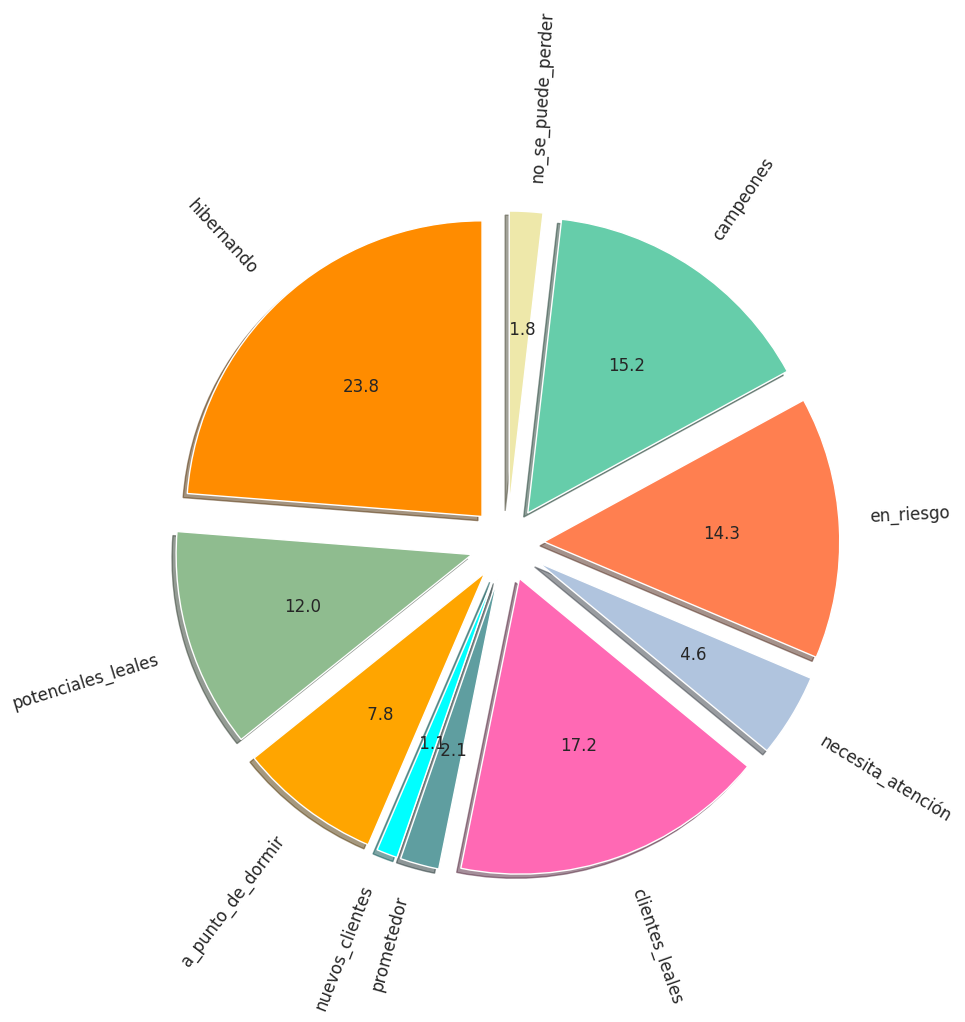

In [51]:
colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

rfm_df["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12},
                                                 autopct = '%4.1f',
                                                 startangle= 90,
                                                 radius =2,
                                                 rotatelabels=True,
                                                 shadow = True,
                                                 explode = explodes)
plt.ylabel("");

**Estrategías de Marketing**

In [52]:
rfm_df[["recency", "frequency", "monetary"]].agg(["mean"])

,recency,frequency,monetary
mean,91.585828,4.371609,1584.118184


In [53]:
rfm_df[["Segment","recency", "frequency", "monetary"]].groupby("Segment").agg(["mean", "count","sum"])

recency                frequency              \
                          mean count     sum       mean count   sum   
Segment                                                               
a_punto_de_dormir    54.048048   333   17998   1.204204   333   401   
campeones             8.099846   651    5273  12.314900   651  8017   
clientes_leales      36.903533   736   27161   6.671196   736  4910   
en_riesgo           151.261011   613   92723   3.048940   613  1869   
hibernando          211.941929  1016  215333   1.125000  1016  1143   
necesita_atención    53.923469   196   10569   2.413265   196   473   
no_se_puede_perder  121.807692    78    9501   9.064103    78   707   
nuevos_clientes       9.612245    49     471   1.000000    49    49   
potenciales_leales   19.834308   513   10175   2.013645   513  1033   
prometedor           26.560440    91    2417   1.000000    91    91   

                       monetary                     
                           mean count          sum  
Segment                                             
a_punto_de_dormir    370.618168   333   123415.850  
campeones           5219.540112   651  3397920.613  
clientes_leales     2135.206489   736  1571511.976  
en_riesgo            999.332171   613   612590.621  
hibernando           329.473783  1016   334745.364  
necesita_atención    774.722398   196   151845.590  
no_se_puede_perder  3077.782564    78   240067.040  
nuevos_clientes      326.198571    49    15983.730  
potenciales_leales   573.170585   513   294036.510  
prometedor           346.945714    91    31572.060



Ahora, centrémonos en algunos segmentos que pueden ser críticamente importantes para las estrategias de marketing.

**Campeones:**
Este segmento constituye el 15% del portafolio de clientes e incluye a 641 clientes que han realizado sus últimas compras en la última semana y generan un promedio de ingresos de 6000 TL. Dado que este segmento está compuesto por clientes que gastan con mayor frecuencia y que pueden adoptar fácilmente nuevos productos y servicios, se pueden implementar estrategias de ventas cruzadas para este segmento.

**Clientes Leales:**
Hay 818 clientes en este segmento, y mientras que la frecuencia de compra promedio es de 4 en todos los segmentos de clientes, se ha observado que las compras promedio son 2 veces más altas en este segmento (la frecuencia promedio es de 8). El valor monetario promedio de este segmento es un 50% superior al promedio general.

Como conclusión, para garantizar que la lealtad del cliente sea sostenible, se pueden organizar comunicaciones de ventas cruzadas alineadas con las expectativas y necesidades de los clientes para este segmento.

**Necesita Atención:**
Hay 184 clientes en este segmento que realizaron su última compra hace casi 2 meses. Aunque no compran con frecuencia, los montos totales de transacciones de estos clientes contribuyen a la rentabilidad.

Como resultado, se pueden organizar campañas de reembolso y bonificaciones para este segmento con el fin de retener a los clientes e incluso trasladarlos a un segmento que realice más compras. De hecho, se pueden planificar ofertas de productos con descuento y campañas basadas en cupones de regalo observando los hábitos de otros clientes con comportamientos similares y analizando las reglas de asociación de productos correspondientes.

**No se puede perder:**
Los clientes del segmento "No se puede perder" tienen una frecuencia de transacción más alta, aunque sus montos de gasto son similares a los del segmento de clientes leales. Sin embargo, dado que estos clientes son casi clientes perdidos que realizaron sus últimas compras hace casi 4 meses.

Por lo tanto, se pueden planificar nuevas estrategias de campaña basadas en recompensas, descuentos y otros incentivos especiales como una forma de atraer y retener a los clientes para que se sientan especiales y leales nuevamente.

In [ ]:
# Obtener valores únicos para cada columna
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("\n")

Valores únicos en la columna 'Invoice':
[489434 489435 489436 ... 538169 538170 538171]


Valores únicos en la columna 'StockCode':
[85048 '79323P' '79323W' ... 22936 22935 22933]


Valores únicos en la columna 'Description':
['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'BAKING MOULD ROSE MILK CHOCOLATE'
 'BAKING MOULD CHOCOLATE CUP CAKES' 'BAKING MOULD EASTER EGG MILK CHOC']


Valores únicos en la columna 'Quantity':
[   12    48    24    10    18     3    16     4     2     6     8     1
    28    30    60    32    56     9    25    36    20   -12    -6    -4
   -24    -3    -2   576   288    27    64   160     5    -1    72    50
    54     7   800    11    58   192    96   144   100   180   216    15
   240   108    33    90    81   -81   -48    17    -5    40    -8    -9
    13    21   120   200   168    19   280   128  -150   -18   -23    80
   300   450    14    61   480    -7    46   504    45  4320  5184  4008
    22   600   505   500

In [ ]:
# Agrupar por la columna 'Country' y contar las facturas (Invoice)
invoice_count = df.groupby('Country')['Invoice'].count()

# Mostrar el resultado
print(invoice_count)


Country
Australia                  654
Austria                    537
Bahrain                    107
Belgium                   1054
Bermuda                     34
Brazil                      62
Canada                      77
Channel Islands            906
Cyprus                     554
Denmark                    428
EIRE                      9670
Finland                    354
France                    5772
Germany                   8129
Greece                     517
Hong Kong                   76
Iceland                     71
Israel                      74
Italy                      731
Japan                      224
Korea                       63
Lebanon                     13
Lithuania                  154
Malta                      172
Netherlands               2769
Nigeria                     32
Norway                     369
Poland                     194
Portugal                  1101
RSA                        111
Singapore                  117
Spain                     1278
